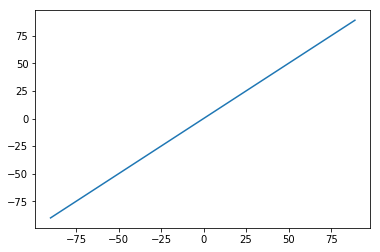

In [ ]:
import matplotlib.pyplot as plt

x = [theta for theta in range(-90,90)]

y = [(theta) for theta in x]

plt.plot(x,y)

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [ ]:
df

,age,gender,name,num_children,num_pets,state
0,23,M,john,2,5,california
1,78,F,mary,0,1,dc
2,22,M,peter,0,0,california
3,19,M,jeff,3,5,dc
4,45,M,bill,2,2,california
5,33,F,lisa,1,2,texas
6,20,M,jose,4,3,texas


In [ ]:
#Plot two columns as scatter plot

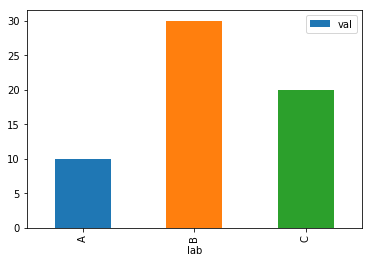

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df1.plot.bar(x='lab', y='val')
plt.show()


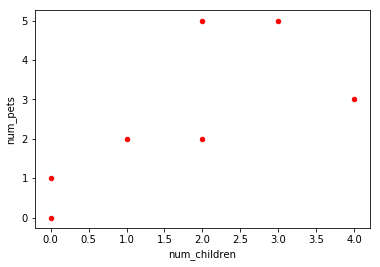

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

In [ ]:
#Plot column values as bar plot

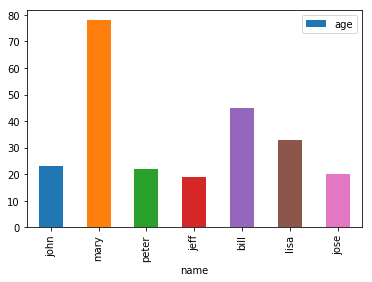

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='name',y='age')

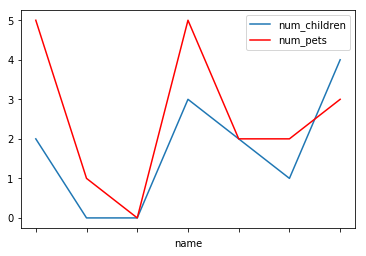

In [ ]:
#Line plot for multiple columnsimport matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

In [ ]:
#Save plot to file

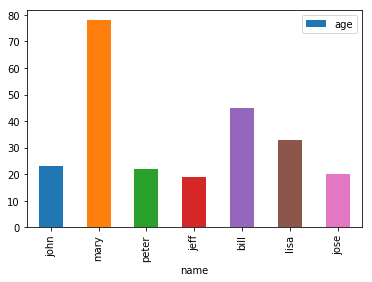

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

In [ ]:
#Bar plot with group by

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

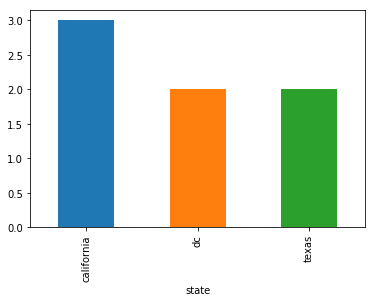

In [ ]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

In [ ]:
#Stacked bar plot with group by

In [ ]:
#create a dummy variable and do a two-level group-by based on it:

#fix the x axis label and the legend

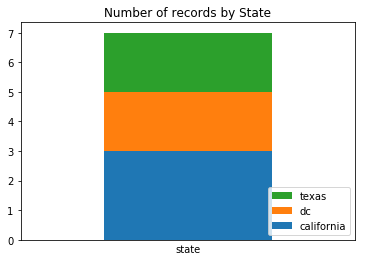

In [ ]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

In [ ]:
#Stacked bar plot with group by, normalized to 100%

#A plot where the columns sum up to 100%.Similar to the example above but:

#normalize the values by dividing by the total amounts, use percentage tick labels for the y axis

#Example: Plot percentage count of records by state

([], <a list of 0 Text xticklabel objects>)

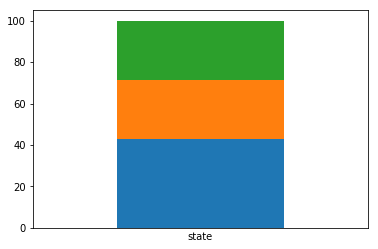

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# create dummy variable then group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

In [ ]:
#Stacked bar plot with two-level group by

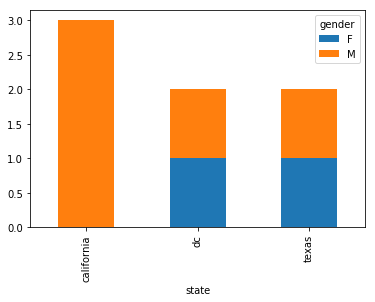

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#Another example: count the people by gender, spliting by state:

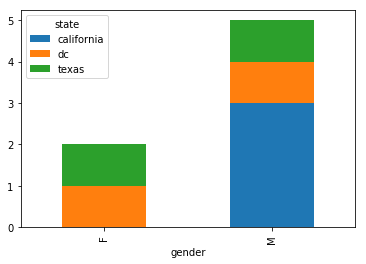

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#Stacked bar plot with two-level group by, normalized to 100%
#Sometimes you are only ever interested in the distributions, not raw amounts:

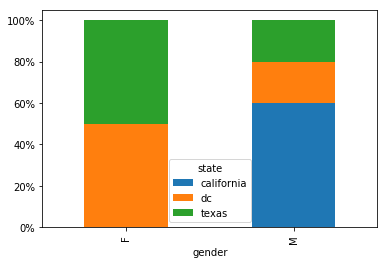

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
#Histogram of column values

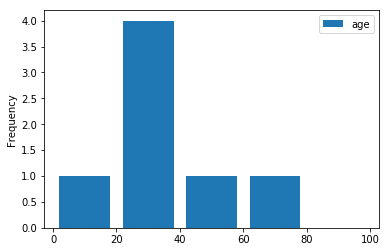

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()
#The most common age group is between 20 and 40 years old

In [ ]:
#Date histogram

In [ ]:
#To plot the number of records per unit of time, you must a) convert the date column to datetime using to_datetime() b) call .plot(kind='hist'):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# source dataframe using an arbitrary date format (m/d/y)
df = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

In [ ]:
#Now convert the date column into datetime type and use plot(kind='hist'):

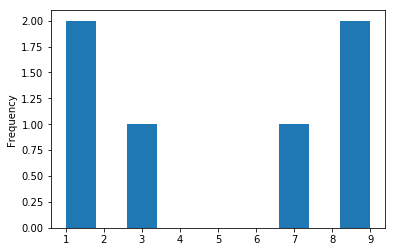

In [ ]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], infer_datetime_format=True)

plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.show()